In [159]:
# importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# create data frame by using movies_2.csv file 
movie_df= pd.read_csv('movies_2.csv')



# #1 Understanding the data 



In [161]:
movie_df.head() # returns 10 first rows 

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,93.0,5.9,73638.0,"After a single, career-minded woman is left on..."
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0,An old Jewish woman and her African-American c...
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,100.0,7.2,91415.0,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,145.0,7.2,91415.0,The biography of Ron Kovic. Paralyzed in the V...
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,107.0,7.5,101702.0,"An Iowa corn farmer, hearing voices, interpret..."


In [162]:
movie_df.tail() # returns 10 last rows

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN,NaN
615,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
movie_df.shape # returns us the number of rows and columns 

(616, 11)

In [164]:
movie_df.info() # shows the number of rows and number of columns with information about every columns such as(datatype, non-null values, number of entries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
 10  Summary       496 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.1+ KB


In [165]:
movie_df['MovieID'].is_unique # returns True if movieID column has unique values

True

In [166]:
movie_df.nunique()

MovieID         616
Title           609
MPAA Rating       4
Budget          148
Gross           612
Release Date    593
Genre            16
Runtime          95
Rating           48
Rating Count    479
Summary         496
dtype: int64

In [167]:
movie_df = movie_df.set_index('MovieID') # set movieID  as dataframe index
movie_df.head(2) # returns only two rows 

,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
MovieID,,,,,,,,,,
1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,93.0,5.9,73638.0,"After a single, career-minded woman is left on..."
2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0,An old Jewish woman and her African-American c...


In [168]:
movie_df.describe()

,Budget,Gross,Runtime,Rating,Rating Count
count,6.150000e+02,6.150000e+02,615.000000,508.000000,5.080000e+02
mean,9.491710e+07,4.453221e+08,118.642276,6.917323,3.392521e+05
std,6.748114e+07,3.394075e+08,22.252376,0.888928,3.213388e+05
min,6.000000e+04,5.300000e+07,79.000000,4.100000,1.491800e+04
25%,4.000000e+07,2.158939e+08,102.000000,6.400000,1.275922e+05
50%,8.000000e+07,3.510404e+08,117.000000,6.900000,2.403475e+05
75%,1.400000e+08,5.851766e+08,132.000000,7.600000,4.257000e+05
max,4.000000e+08,2.796000e+09,201.000000,9.000000,2.127228e+06



# #2 Cleaning the data


In [169]:
movie_df.isna().sum() # returns sum of the null value for every columns 

Title             1
MPAA Rating       1
Budget            1
Gross             1
Release Date      1
Genre             1
Runtime           1
Rating          108
Rating Count    108
Summary         120
dtype: int64

In [170]:
movie_df.duplicated().sum() # returns us sum of the duplicated values 

0

In [171]:
# movie_df = movie_df.fillna(0) --- one way to fill nan values in a dataframe 
#movie_df['Budget'].replace([np.nan], movie_df['Budget'].mean(), inplace=True) # this method replace nan value with mean of specific column
#movie_df['Budget'].isna().sum()

In [172]:
#movie_df['Rating'].replace([np.nan],movie_df['Rating'].mode(), inplace= True) # replace nan value with mode value in a specific column
#movie_df['Rating'].isna().sum()

In [173]:
#movie_df['Rating Count'].replace([np.nan],movie_df['Rating Count'].median(), inplace= True)
#movie_df['Rating Count'].isna().sum()

In [174]:
# Fill Missing Data With interpolate()
#The interpolate() function uses existing values in the DataFrame to estimate the missing rows. Setting the inplace keyword to True alters the DataFrame permanently.
#movie_df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#movie_df.interpolate(method='linear', limit_direction='forward', inplace= True)
#movie_df['Rating Count'].interpolate()
movie_df = movie_df.fillna(0)
movie_df.isna().sum()

Title           0
MPAA Rating     0
Budget          0
Gross           0
Release Date    0
Genre           0
Runtime         0
Rating          0
Rating Count    0
Summary         0
dtype: int64

# #3 Relationship analysis

In [178]:
movies = movie_df.corr() 
movies# returns the relationship of the columns with each others


,Budget,Gross,Runtime,Rating,Rating Count
Budget,1.000000,0.704629,0.304348,-0.327858,0.078152
Gross,0.704629,1.000000,0.318677,-0.331106,0.177678
Runtime,0.304348,0.318677,1.000000,0.030855,0.299878
Rating,-0.327858,-0.331106,0.030855,1.000000,0.565909
Rating Count,0.078152,0.177678,0.299878,0.565909,1.000000


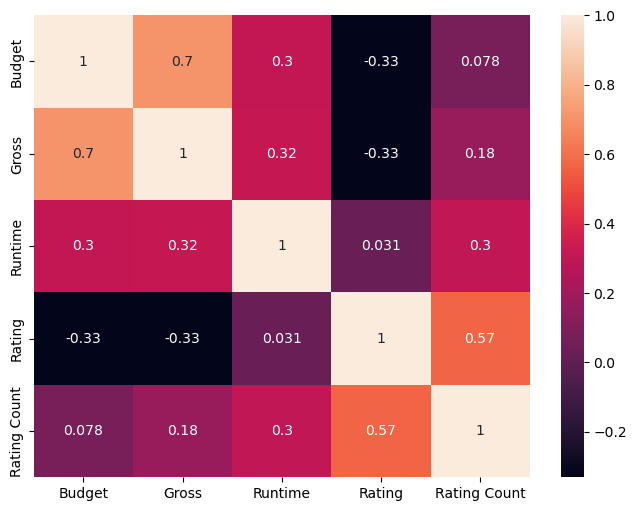

In [183]:
plt.figure(figsize=(8,6))
sns.heatmap(movies, xticklabels=movies.columns, yticklabels=movies.columns, annot=True)
plt.show()